## Digit Classification 
- Using SVM, Decision Trees and Boosting methods.
    - SVMs are powerful for high-dimensional data and perform well on nonlinear boundaries. 
    - Decision Trees provides a simple, interpretable baseline model. Trees can capture nonlinear relationships and feature interactions.
    - Adaboost improves weak learners (like shallow trees) by combining them sequentially to reduce bias and variance.
    - Gradient boosting builds trees iteratively by minimizing residual errors, and generally achieves high accuracy.

## Loading the data

In [5]:
import pandas as pd
train_data = pd.read_csv('pendigits.tra',header=None)
test_data = pd.read_csv('pendigits.tes',header=None)
print("Rows and Columns in train data:",train_data.shape)
print("Rows and Columns in test data:",test_data.shape)
train_data.head()

Rows and Columns in train data: (7494, 17)
Rows and Columns in test data: (3498, 17)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


#### Splitting features and target labels for training

In [6]:
X_train = train_data.iloc[:,:-1]
Y_train = train_data.iloc[:,-1]
X_test = test_data.iloc[:,:-1]
Y_test = test_data.iloc[:,-1]
print("Train Features rows and cols:",X_train.shape)
print("Test Features rows and cols:",X_test.shape)
print("Train labels:",Y_train.shape)
print("Test labels:",Y_test.shape)

Train Features rows and cols: (7494, 16)
Test Features rows and cols: (3498, 16)
Train labels: (7494,)
Test labels: (3498,)


#### Fitting SVM classifier with a Gaussian kernel (also known as radial basis function) on the training data set.


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

scaling = StandardScaler()
X_train_scaled = scaling.fit_transform(X_train)
X_test_scaled = scaling.transform(X_test)

svc_gaussian_model = SVC(kernel='rbf',random_state=598)

param_dist = {
    'C': np.logspace(-2, 3, 10),
    'gamma': np.logspace(-4, 0, 10),
    'kernel': ['rbf']
}

rand_svm = RandomizedSearchCV(
    estimator= svc_gaussian_model,
    param_distributions=param_dist, 
    n_iter=5, cv=5,
    random_state=598
)
rand_svm.fit(X_train_scaled, Y_train)
y_svc_train_pred = rand_svm.predict(X_train_scaled)
y_svc_test_pred = rand_svm.predict(X_test_scaled)

#### Fitting Decision Tree classifier on the training data set.

In [37]:
from sklearn.tree import DecisionTreeClassifier
full_tree_model = DecisionTreeClassifier(random_state=598)

full_tree_model.fit(X_train,Y_train)


y_train_tree_pred = full_tree_model.predict(X_train)
y_test_tree_pred = full_tree_model.predict(X_test)

 #### Fitting Adaboost Classifier on the training data set.

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

base_estimator = DecisionTreeClassifier(random_state=598)
ada_boost_model = AdaBoostClassifier(estimator=base_estimator)
param_dist = {
    'estimator__max_depth': [2, 3, 4, 5],
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 1.0)
}

random_searchcv_ada = RandomizedSearchCV(
    estimator=ada_boost_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    random_state=598
)

random_searchcv_ada.fit(X_train, Y_train)
y_train_pred_ada = random_searchcv_ada.predict(X_train)
y_test_pred_ada = random_searchcv_ada.predict(X_test)

##### Fitting Gradient Boosting classifier on the training data set

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
param_dist = {
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 1.0)
}
radom_gradient_search = RandomizedSearchCV(
    estimator = GradientBoostingClassifier(),
    param_distributions=param_dist,
    random_state=598,
    cv=5   
)
radom_gradient_search.fit(X_train,Y_train)
y_train_pred_gradient = radom_gradient_search.predict(X_train)
y_test_pred_gradient = radom_gradient_search.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END learning_rate=0.8084184677915531, max_depth=5, n_estimators=136; total time=  39.2s
[CV] END learning_rate=0.8084184677915531, max_depth=5, n_estimators=136; total time=   8.4s
[CV] END learning_rate=0.8084184677915531, max_depth=5, n_estimators=136; total time=  11.9s
[CV] END learning_rate=0.8084184677915531, max_depth=5, n_estimators=136; total time=  26.8s
[CV] END learning_rate=0.8084184677915531, max_depth=5, n_estimators=136; total time=  19.1s
[CV] END learning_rate=0.7190941103959684, max_depth=2, n_estimators=183; total time=  17.6s
[CV] END learning_rate=0.7190941103959684, max_depth=2, n_estimators=183; total time=  21.2s
[CV] END learning_rate=0.7190941103959684, max_depth=2, n_estimators=183; total time=  20.7s
[CV] END learning_rate=0.7190941103959684, max_depth=2, n_estimators=183; total time=  20.0s
[CV] END learning_rate=0.7190941103959684, max_depth=2, n_estimators=183; total time=  20.5s
[CV] END 

##### Accuracy of SVM classifier with Gaussian kernel

In [54]:
print("Best parameters of SVM classifier:", rand_svm.best_params_)
print("Train Accuracy:", accuracy_score(Y_train, y_svc_train_pred))
print("Test Accuracy:", accuracy_score(Y_test, y_svc_test_pred))

Best parameters of SVM classifier: {'kernel': 'rbf', 'gamma': 0.12915496650148828, 'C': 5.994842503189409}
Train Accuracy: 0.999599679743795
Test Accuracy: 0.9802744425385935


##### Accuracy of Decision Tree classifier

In [41]:
print("Depth of the full tree model:", full_tree_model.get_depth())
print("Traning data accuracy:",accuracy_score(Y_train,y_train_tree_pred))
print("Testing data accuracy:",accuracy_score(Y_test, y_test_tree_pred))

Depth of the full tree model: 17
Traning data accuracy: 1.0
Testing data accuracy: 0.9188107489994283


##### Accuracy of Adaboost

In [52]:
print("Adaboost classification Accuracy")
print("Adaboost RandomizedSearchCV best paramters:",random_searchcv_ada.best_params_)
print("Traning data accuracy:",accuracy_score(Y_train,y_train_pred_ada))
print("Testing data accuracy:",accuracy_score(Y_test, y_test_pred_ada))

Adaboost classification Accuracy
Adaboost RandomizedSearchCV best paramters: {'estimator__max_depth': 5, 'learning_rate': 0.5965972502262388, 'n_estimators': 139}
Traning data accuracy: 1.0
Testing data accuracy: 0.967409948542024


##### Accuracy of Gradient Boosting

In [55]:
print("Gradient boost RandomizedSearchCV best paramters:",radom_gradient_search.best_params_)
print("Traning data accuracy:",accuracy_score(Y_train,y_train_pred_gradient))
print("Testing data accuracy:",accuracy_score(Y_test, y_test_pred_gradient))

Gradient boost RandomizedSearchCV best paramters: {'learning_rate': 0.18405896846291558, 'max_depth': 4, 'n_estimators': 190}
Traning data accuracy: 1.0
Testing data accuracy: 0.9651229273870783


#### Confusion matrix for the train and test predictions.

Text(0.5, 1.0, 'Confusion matrix of Gradient Boost classifier(Test data)')

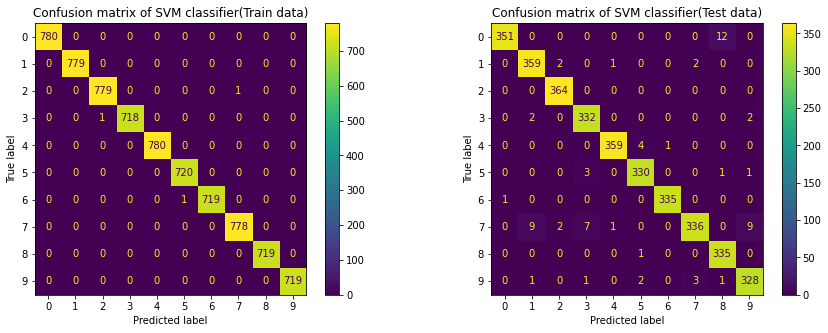

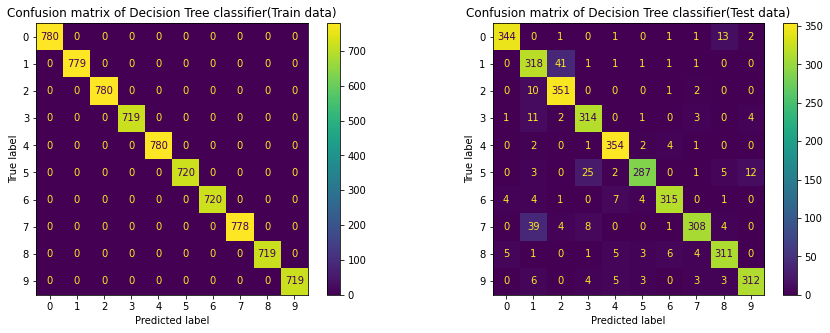

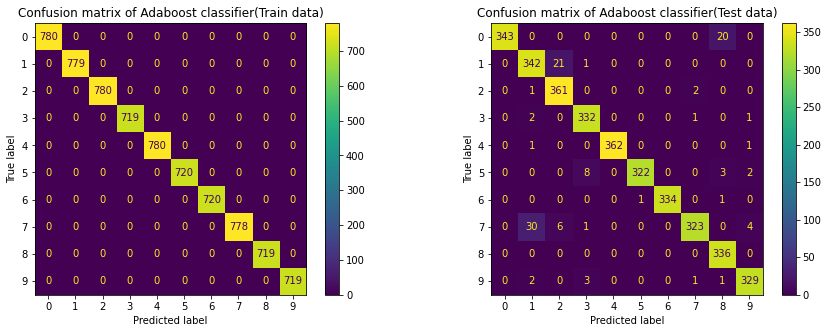

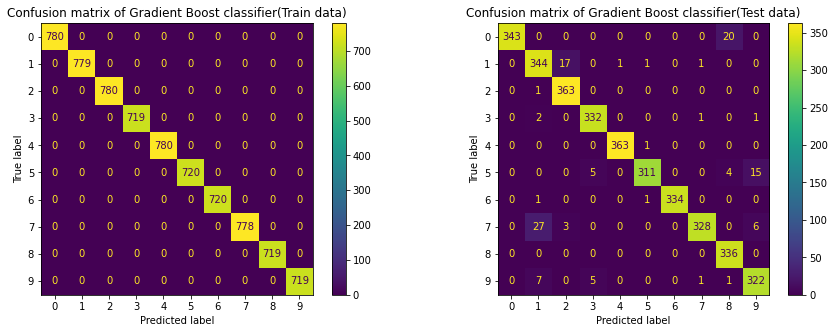

In [56]:
import matplotlib.pyplot as plt

# SVM classifier Gausian kernel
fig,axes = plt.subplots(1,2,figsize=(15,5))
disp_train_svm_cm = ConfusionMatrixDisplay(confusion_matrix(Y_train, y_svc_train_pred),display_labels=rand_svm.classes_)
disp_train_svm_cm.plot(ax = axes[0])
axes[0].set_title("Confusion matrix of SVM classifier(Train data)")

disp_test_svm_cm = ConfusionMatrixDisplay(confusion_matrix(Y_test, y_svc_test_pred),display_labels=rand_svm.classes_)
disp_test_svm_cm.plot(ax = axes[1])
axes[1].set_title("Confusion matrix of SVM classifier(Test data)")


# Decision Tree Classifier
fig,axes = plt.subplots(1,2,figsize=(15,5))
disp_train_tree_cm = ConfusionMatrixDisplay(confusion_matrix(Y_train, y_train_tree_pred),display_labels=full_tree_model.classes_)
disp_train_tree_cm.plot(ax = axes[0])
axes[0].set_title("Confusion matrix of Decision Tree classifier(Train data)")

disp_test_tree_cm = ConfusionMatrixDisplay(confusion_matrix(Y_test, y_test_tree_pred),display_labels=full_tree_model.classes_)
disp_test_tree_cm.plot(ax = axes[1])
axes[1].set_title("Confusion matrix of Decision Tree classifier(Test data)")

# Ada Boost Classifier
fig,axes = plt.subplots(1,2,figsize=(15,5))
disp_train_ada_cm = ConfusionMatrixDisplay(confusion_matrix(Y_train, y_train_pred_ada),display_labels=random_searchcv_ada.classes_)
disp_train_ada_cm.plot(ax = axes[0])
axes[0].set_title("Confusion matrix of Adaboost classifier(Train data)")

disp_test_ada_cm = ConfusionMatrixDisplay(confusion_matrix(Y_test, y_test_pred_ada),display_labels=random_searchcv_ada.classes_)
disp_test_ada_cm.plot(ax = axes[1])
axes[1].set_title("Confusion matrix of Adaboost classifier(Test data)")

# Gradient Boost Classifier
fig,axes = plt.subplots(1,2,figsize=(15,5))
disp_train_gradient_cm = ConfusionMatrixDisplay(confusion_matrix(Y_train, y_train_pred_gradient),display_labels=radom_gradient_search.classes_)
disp_train_gradient_cm.plot(ax = axes[0])
axes[0].set_title("Confusion matrix of Gradient Boost classifier(Train data)")

disp_test_gradient_cm = ConfusionMatrixDisplay(confusion_matrix(Y_test, y_test_pred_gradient),display_labels=radom_gradient_search.classes_)
disp_test_gradient_cm.plot(ax = axes[1])
axes[1].set_title("Confusion matrix of Gradient Boost classifier(Test data)")


#### Consolidated results of multiclass classification of all the models

- Consolidated accuracy score for all models
    - Total number of train samples 7494
    - Total number of test samples 3498

| Model                 | Parameters                                                               |Train Acc | Test Acc   | Comments                                                     |
| --------------------- | ------------------------------------------------------------------------ |--------- | ---------- | ------------------------------------------------------------ |
| **SVM (RBF)**         | kernel='rbf', C=5.99, gamma=0.129                                        |0.9996    | **0.9803** | Highest test accuracy. Good generalization.                  |
| Decision Tree         | max_depth=17 (full tree)                                                 |1.0       | 0.9188     | High Train accuracy. But less Test accuracy. Overfitting     |
| AdaBoost              | n_estimators=139, learning_rate=0.597, base_estimator__max_depth=5       |1.0       | 0.9674     | Good genaralization. But less test accuracy comapred to SVM  |
| Gradient Boosting     | n_estimators=190, learning_rate=0.184, max_depth=4.                      |1.0       | 0.9651     | Good genaralization. But less test accuracy comapred to SVM  |


##### SVM Model Confusion Matrix
- Very few off-diagonal errors, that is most digits are correctly classified.
- Test Accuracy ~98%
- Following are the misclassified digits in the form 
    - (True digit, Predicted digit)
    - (0,8) - 12 samples
    - (7,9) - 9 samples
    - (7,1) - 9 samples
    - (7,3) - 7 samples
- 0 and 7 are often misclassifeid SVM gaussian classifier.

##### Decision Tree Confusion Matrix
- Test Accuracy ~ 91%
- Following are the misclassified digits in the form 
    - (True digit, Predicted digit)
    - (1,2) - 41 samples
    - (7,1) - 39 samples
    - (5,3) - 25 samples
    - (0,8) - 13 samples
- 1,7,5,0 are often misclassified using Decision tree classifier.

##### Adaboost Confusion Matrix
- Test Accuracy ~96%
- Following are the misclassified digits in the form 
    - (True digit, Predicted digit)
    - (0,8) - 20 samples
    - (1,2) - 21 samples
    - (7,1) - 30 samples
    - (7,2) - 6 samples
- 0,1,7 are often misclassified using Adaboost classifier.

##### Gradient Boosting Confusion matrix
- Test Accuracy ~96%
- Following are the misclassified digits in the form 
    - (True digit, Predicted digit)
    - (0,8) - 20 samples
    - (1,2) - 17 samples
    - (7,1) - 27 samples
- 0,1,7 are often misclassified using Gradient Descent classifier.


##### **Overall SVM gausian kernel model performed better in classifying the digits and also had good generalization when comapared to other models.**
##### **Digits 0 and 7 are often misclassified by all models.**